## **23-2 DSL 기초과제 2**
기수 : 10기<br>
이름 : 신재우

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### **1. 2016 presidential election in US**

https://elections.huffingtonpost.com/2016/forecast/president

#### **1-1.** 자료 A와 자료 B를 각각 ‘pres’, ‘polls’라는 이름의 개체(DataFrame)로 저장하시오.

In [45]:
pres = pd.read_csv("turnout_2016.csv")
pres.head()

,county,fips,cand,st,pct_report,votes,total_votes,lead,pct,state.name
0,NaN,US,Donald Trump,US,0.9968,61195258,130180957,Donald Trump,0.470078,NaN
1,NaN,US,Hillary Clinton,US,0.9968,62521739,130180957,Donald Trump,0.480268,NaN
2,NaN,US,Gary Johnson,US,0.9968,4274900,130180957,Donald Trump,0.032838,NaN
3,NaN,US,Jill Stein,US,0.9968,1316040,130180957,Donald Trump,0.010109,NaN
4,NaN,US,Evan McMullin,US,0.9968,469770,130180957,Donald Trump,0.003609,NaN


In [46]:
polls = pd.read_csv("polls_huffington.csv")
polls.head()

,Unnamed: 0,id,state,Clinton,Trump,Undecided,days_to_election,electoral_votes,sample_size
0,1,1,alabama,0.36,0.55,0.02,4,9,1131.0
1,2,2,alabama,0.37,0.58,0.05,5,9,341.0
2,3,3,alabama,0.38,0.54,0.08,12,9,585.0
3,4,4,alabama,0.35,0.55,0.03,11,9,485.0
4,5,5,alabama,0.37,0.58,0.05,13,9,349.0


#### **1-2.** 자료 A에서 집계된 대선 후보의 이름을 확인하고, 몇 명의 후보가 집계되었는지 파악하시오.

In [47]:
pres_candidates = pres['cand'].sort_values().unique()
print("집계된 출마 후보 = ", pres_candidates)
print("집계된 출마 후보 수 =", len(pres_candidates)-1)

집계된 출마 후보 =  [' None of these candidates' 'Alyson Kennedy' 'Bradford Lyttle'
 'Chris Keniston' 'Dan Vacek' 'Darrell Castle' 'Donald Trump'
 'Emidio Soltysik' 'Evan McMullin' 'Frank Atwood' 'Gary Johnson'
 'Gloria La Riva' 'Hillary Clinton' 'Jerry White' 'Jill Stein'
 'Jim Hedges' 'Joseph Maldonado' 'Kyle Kopitke' 'Laurence Kotlikoff'
 'Lynn Kahn' 'Michael Maturen' 'Mike Smith' 'Monica Moorehead'
 'Peter Skewes' 'Princess Jacob' 'Richard Duncan' 'Rocky De La Fuente'
 'Rocky Giordani' 'Rod Silva' 'Ryan Scott' 'Scott Copeland' 'Tom Hoefling']
집계된 출마 후보 수 = 31


#### **1-3.** 자료 A로 다음의 조건을 만족하는 새로운 개체(DataFrame) ‘results’를 만드시오.
● 각 주에서의 클린턴 후보 득표율과 트럼프 후보 득표율을 저장 <br>
● 총 열 개수는 3개가 되어야 함 - 열 이름 : State, Clinton, Trump <br>
● 총 행 개수는 워싱턴 D.C.를 포함하여 51개가 되어야 함 <br>

In [48]:
# 주 이름(줄임말) 확인
np.unique(pres['st'])

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'US', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [49]:
# 'US' 제거하기(현 상황에서 필요하지 않음)
statelist = np.unique(pres['st'])
statelist = np.delete(statelist, -8)
statelist

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [50]:
# 비어있는 데이터프레임 만들기
columns=['State','Clinton','Trump']
results = pd.DataFrame(columns=columns)
results

,State,Clinton,Trump


In [51]:
# for문으로 행 순차적으로 채우기
# 빈칸에는 알맞은 메소드가 들어가야 합니다.
for i in statelist:
    A = pres.loc[(pres['st']==i) & (pres['fips']==i)] # 또는 (pres['st']==i) & (pres['county'].isnull())
    results = results.append(pd.DataFrame([[i,A.iloc[1]['pct'],A.iloc[0]['pct']]], columns=columns), ignore_index=True)   

/var/folders/8j/j9hqtmwj4ydg8l7ks8q4fc980000gn/T/ipykernel_2932/23171030.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i,A.iloc[1]['pct'],A.iloc[0]['pct']]], columns=columns), ignore_index=True)
/var/folders/8j/j9hqtmwj4ydg8l7ks8q4fc980000gn/T/ipykernel_2932/23171030.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i,A.iloc[1]['pct'],A.iloc[0]['pct']]], columns=columns), ignore_index=True)
/var/folders/8j/j9hqtmwj4ydg8l7ks8q4fc980000gn/T/ipykernel_2932/23171030.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([[i,A.iloc[1]['pct'],A.iloc[0]['pct']]], columns=columns), ignore_index=True)
/var/folde

In [52]:
# 결과 확인
results

,State,Clinton,Trump
0,AK,0.377176,0.528878
1,AL,0.345538,0.628884
2,AR,0.337643,0.604363
3,AZ,0.453871,0.495031
4,CA,0.327598,0.615885
5,CO,0.443593,0.472746
6,CT,0.411610,0.544755
7,DC,0.041221,0.928466
8,DE,0.419226,0.533550
9,FL,0.477881,0.490640


#### **1-4.** 다음의 조건을 만족하는 새로운 개체(DataFrame) ‘CL’ 및 ‘TR’을 만드시오.
● CL : 클린턴 후보의 자료, TR : 트럼프 후보의 자료 <br>
● 50개 주 각각에서 후보의 실제 득표율, 예측 득표율, 표본 수를 저장 <br>
● 예측 득표율의 경우, 선거일 기준 가장 최근의 날짜에 집계된 결과만 활용(누적된 결과이므로) <br>
● 총 열 개수는 4개가 되어야 함 - 열 이름 : State, Real, Prediction, Sample_size <br>
● 총 행 개수는 워싱턴 D.C.를 포함하여 51개가 되어야 함 <br>

In [53]:
# 빈 데이터프레임 만들기
columns2 = ['State','Real','Prediction','Sample_size']
CL = pd.DataFrame(columns=columns2)
CL

,State,Real,Prediction,Sample_size


In [54]:
# 주 이름 모음
statelist2 = np.unique(polls['state'])
len(statelist2)

51

In [55]:
# 각 주별로 선거일과 가장 가까운 날에 집계된 결과만 정리
# 빈칸에는 알맞는 메소드가 들어가야 합니다.
B = polls.loc[polls.groupby('state')['days_to_election'].idxmin()]
B = B.reset_index()
B.head()

,index,Unnamed: 0,id,state,Clinton,Trump,Undecided,days_to_election,electoral_votes,sample_size
0,0,1,1,alabama,0.36,0.55,0.02,4,9,1131.0
1,12,13,13,alaska,0.31,0.48,0.03,4,3,409.0
2,24,25,25,arizona,0.41,0.43,0.08,3,11,392.0
3,66,67,67,arkansas,0.32,0.56,0.02,4,6,930.0
4,79,80,80,california,0.54,0.32,0.07,3,55,401.0


In [56]:
# Cinton 후보
CL['State'] = statelist2
# CL['Real'] = 순서정리 필요
CL['Prediction'] = B['Clinton']
CL['Sample_size'] = B['sample_size']
CL.head()

,State,Real,Prediction,Sample_size
0,alabama,NaN,0.36,1131.0
1,alaska,NaN,0.31,409.0
2,arizona,NaN,0.41,392.0
3,arkansas,NaN,0.32,930.0
4,california,NaN,0.54,401.0


results 표와 CL, TR 표의 주 이름 순서가 달라서, CL, TR 표의 주 이름 순서에 맞도록 하여 adjusted라는 list에 저장했습니다.

In [57]:
adjusted = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'] 

In [58]:
# CL['Real'] 순서정리 및 실제 득표율 모음
for i in range(51):
    S = B['state'][i]
    for j in range(51) :
        D = statelist2[j]
        if  S == D :
            CL['Real'][i] = results[results['State']==adjusted[j]]['Clinton'].values[0]

/var/folders/8j/j9hqtmwj4ydg8l7ks8q4fc980000gn/T/ipykernel_2932/661377766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CL['Real'][i] = results[results['State']==adjusted[j]]['Clinton'].values[0]


In [59]:
# 결과 확인
CL.head()

,State,Real,Prediction,Sample_size
0,alabama,0.345538,0.36,1131.0
1,alaska,0.377176,0.31,409.0
2,arizona,0.453871,0.41,392.0
3,arkansas,0.337643,0.32,930.0
4,california,0.327598,0.54,401.0


In [60]:
# 빈 데이터프레임 만들기
TR = pd.DataFrame(columns=columns2)
TR

,State,Real,Prediction,Sample_size


In [61]:
TR['State'] = statelist2

In [62]:
statelist2

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'dc', 'delaware', 'florida', 'georgia',
       'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new-hampshire', 'new-jersey', 'new-mexico',
       'new-york', 'north-carolina', 'north-dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode-island', 'south-carolina',
       'south-dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virginia', 'washington', 'west-virginia', 'wisconsin', 'wyoming'],
      dtype=object)

In [63]:
# Trump 후보
TR['State'] = statelist2
# TR['Real'] = 순서정리 필요
TR['Prediction'] = B['Trump']
TR['Sample_size'] = B['sample_size']
TR.head()

,State,Real,Prediction,Sample_size
0,alabama,NaN,0.55,1131.0
1,alaska,NaN,0.48,409.0
2,arizona,NaN,0.43,392.0
3,arkansas,NaN,0.56,930.0
4,california,NaN,0.32,401.0


In [64]:
# TR['Real'] 순서정리 및 실제 득표율 모음
for i in range(51):
    S = B['state'][i]
    for j in range(51) :
        D = statelist2[j]
        if  S == D :
            TR['Real'][i] = results[results['State']==adjusted[j]]['Trump'].values[0]

/var/folders/8j/j9hqtmwj4ydg8l7ks8q4fc980000gn/T/ipykernel_2932/3896477741.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TR['Real'][i] = results[results['State']==adjusted[j]]['Trump'].values[0]


In [65]:
# 결과 확인
TR.head()

,State,Real,Prediction,Sample_size
0,alabama,0.628884,0.55,1131.0
1,alaska,0.528878,0.48,409.0
2,arizona,0.495031,0.43,392.0
3,arkansas,0.604363,0.56,930.0
4,california,0.615885,0.32,401.0


#### **1-5.** 후보별 득표율의 예측오차 분포를 히스토그램으로 시각화하시오.

##### 1) Clinton

(array([27.,  9.,  3.,  2.,  2.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  0.,
         0.,  2.]),
 array([4.29237324e-04, 3.09859101e-02, 6.15425828e-02, 9.20992556e-02,
        1.22655928e-01, 1.53212601e-01, 1.83769274e-01, 2.14325947e-01,
        2.44882619e-01, 2.75439292e-01, 3.05995965e-01, 3.36552638e-01,
        3.67109310e-01, 3.97665983e-01, 4.28222656e-01, 4.58779329e-01]),
 <BarContainer object of 15 artists>)

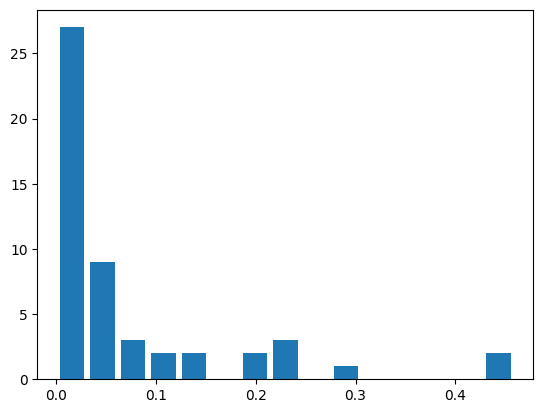

In [66]:
# Bias_C : Clinton 후보의 예측오차
# 답안을 작성해주세요!
Bias_C =  abs(CL['Real'] - CL['Prediction'])
plt.hist(Bias_C, bins = 15, rwidth = 0.8)

##### 2) Trump

(array([ 9., 21.,  6.,  1.,  5.,  1.,  0.,  2.,  2.,  2.,  0.,  0.,  1.,
         0.,  1.]),
 array([0.0233615 , 0.05770179, 0.09204209, 0.12638238, 0.16072267,
        0.19506297, 0.22940326, 0.26374356, 0.29808385, 0.33242415,
        0.36676444, 0.40110474, 0.43544503, 0.46978533, 0.50412562,
        0.53846592]),
 <BarContainer object of 15 artists>)

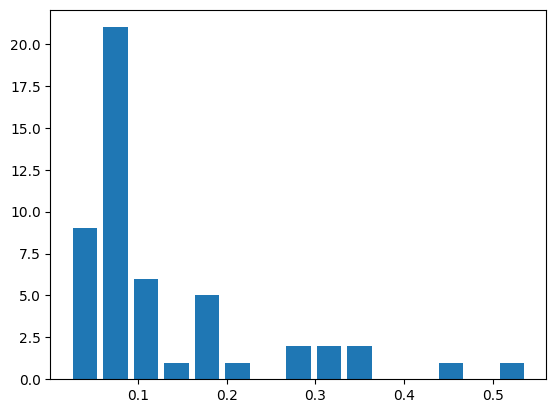

In [67]:
# Bias_T : Trump 후보의 예측오차
# 답안을 작성해주세요!
Bias_T = abs(TR['Real'] - TR['Prediction'])
plt.hist(Bias_T, bins = 15, rwidth = 0.8)

#### **1-6.** ‘CL’과 ‘TR’에 각각 표준오차를 담은 ‘SE’라는 열(column)을 추가하시오.

In [68]:
# 답안을 작성해주세요!
CL['SE'] = (CL['Prediction'] * (1 - CL['Prediction']) / (CL['Sample_size']))**(0.5)
TR['SE'] = (TR['Prediction'] * (1 - TR['Prediction']) / (TR['Sample_size']))**(0.5)

In [69]:
CL.head()

,State,Real,Prediction,Sample_size,SE
0,alabama,0.345538,0.36,1131.0,0.014273
1,alaska,0.377176,0.31,409.0,0.022869
2,arizona,0.453871,0.41,392.0,0.024841
3,arkansas,0.337643,0.32,930.0,0.015296
4,california,0.327598,0.54,401.0,0.024889


In [70]:
TR.head()

,State,Real,Prediction,Sample_size,SE
0,alabama,0.628884,0.55,1131.0,0.014793
1,alaska,0.528878,0.48,409.0,0.024704
2,arizona,0.495031,0.43,392.0,0.025005
3,arkansas,0.604363,0.56,930.0,0.016277
4,california,0.615885,0.32,401.0,0.023295


#### **1-7.** ‘CL’과 ‘TR’에 각각 근사신뢰구간(approximate confidence interval)의 하한과 상한을 나타내는 열(column) ‘lower’과 ‘upper’를 추가하시오(유의수준 5%).

In [71]:
# 분위수값 구하는 방법
from scipy.stats import norm
Z = norm(loc = 0, scale = 1) # 표준정규분포를 따르는 확률변수 만들기
Z.ppf(0.95)

1.6448536269514722

In [72]:
CL['upper'] = CL['SE']*Z.ppf(0.975) + CL['Prediction']
CL['lower'] = -CL['SE']*Z.ppf(0.975) + CL['Prediction']
CL

,State,Real,Prediction,Sample_size,SE,upper,lower
0,alabama,0.345538,0.36,1131.0,0.014273,0.387974,0.332026
1,alaska,0.377176,0.31,409.0,0.022869,0.354822,0.265178
2,arizona,0.453871,0.41,392.0,0.024841,0.458688,0.361312
3,arkansas,0.337643,0.32,930.0,0.015296,0.349980,0.290020
4,california,0.327598,0.54,401.0,0.024889,0.588781,0.491219
5,colorado,0.443593,0.43,2777.0,0.009395,0.448413,0.411587
6,connecticut,0.41161,0.52,1387.0,0.013415,0.546293,0.493707
7,dc,0.419226,0.85,310.0,0.020280,0.889749,0.810251
8,delaware,0.041221,0.50,367.0,0.026100,0.551155,0.448845
9,florida,0.477881,0.48,853.0,0.017106,0.513527,0.446473


In [73]:
TR['upper'] = TR['SE']*Z.ppf(0.975) + TR['Prediction']
TR['lower'] = -TR['SE']*Z.ppf(0.975) + TR['Prediction']
TR

,State,Real,Prediction,Sample_size,SE,upper,lower
0,alabama,0.628884,0.55,1131.0,0.014793,0.578994,0.521006
1,alaska,0.528878,0.48,409.0,0.024704,0.528418,0.431582
2,arizona,0.495031,0.43,392.0,0.025005,0.479009,0.380991
3,arkansas,0.604363,0.56,930.0,0.016277,0.591903,0.528097
4,california,0.615885,0.32,401.0,0.023295,0.365657,0.274343
5,colorado,0.472746,0.40,2777.0,0.009296,0.418221,0.381779
6,connecticut,0.544755,0.36,1387.0,0.012889,0.385261,0.334739
7,dc,0.53355,0.07,310.0,0.014491,0.098403,0.041597
8,delaware,0.928466,0.39,367.0,0.025460,0.439901,0.340099
9,florida,0.49064,0.46,853.0,0.017065,0.493446,0.426554


#### **1-8.** 클린턴 후보와 트럼프 후보 각각의 여론조사 신뢰수준을 구하시오.

##### 1) Clinton

In [74]:
# 답안을 작성해주세요!
CL['inside'] = (CL['Real'] > CL['lower']) & (CL['Real'] < CL['upper'])
CL['inside'].mean()

0.5098039215686274

##### 2) Trump

In [75]:
# 답안을 작성해주세요!
TR['inside'] = (TR['Real'] > TR['lower']) & (TR['Real'] < TR['upper'])
TR['inside'].mean()

0.0784313725490196

#### **1-9.** ✎ 왜 이런 결과가 나왔다고 생각하십니까? 개인의 생각을 자유롭게 서술하시오.
참고 : https://www.vox.com/policy-and-politics/2020/11/10/21551766/election-polls-results-wrong-david-shor


*답안:* <br>
결과를 본다면 Clinton 의 여론조사 신뢰수준은 50.98% 이며 Trump 는 7.84%으로 훨씬 낮은 수치를 가지고 있습니다. 이 결과가 추출된 데이터는 여론조사를 통해서 얻어낸 데이터이며, 데이터가 Clinton 후보에 Biased 됐다는 것을 알려줍니다. 이것은 표본추출의 에러 중 하나인 Undercoverage 를 의미하며 이것이 발생하면 Sampling Error 가 발생하면서 분석은 굉장히 잘못된 결과를 산출하는 수밖에 없습니다.